In [31]:
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 100

from pandas import Grouper
from pandas import Series
from statsmodels.tsa.stattools import adfuller

from pandas import read_csv
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from math import sqrt
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import numpy as np
import warnings

import pandas as pd
import datetime
import matplotlib.pyplot as plt

Dataset 1163, Validation 300
             Close
count  1464.000000
mean   4256.558471
std     821.915000
min    1972.693237
25%    3727.208252
50%    4227.199707
75%    4800.000000
max    6400.000000


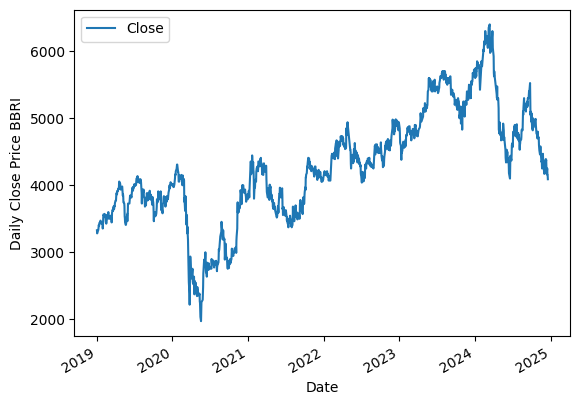

In [32]:
# separate out a validation dataset
from pandas import read_csv
series = read_csv('../../Dataset/BBRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - (300 + end)
dataset, validation = series[0:split_point], series[split_point:-end]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

print(series.describe())
series.plot()
pyplot.ylabel("Daily Close Price BBRI")
pyplot.show()

                 1
count  1163.000000
mean   4033.694412
std     728.258711
min    1972.693237
25%    3590.847168
50%    4036.293945
75%    4475.000000
max    5700.000000


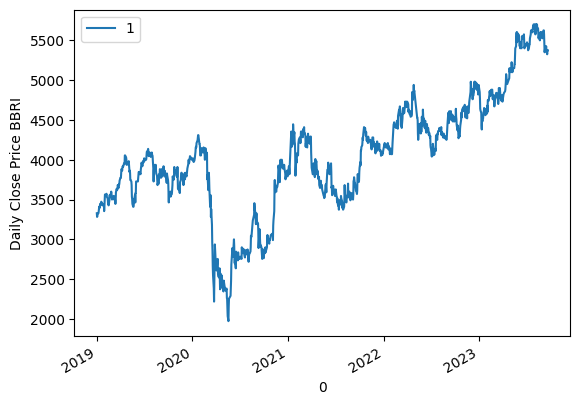

In [33]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True)
print(series.describe())
series.plot()
pyplot.ylabel("Daily Close Price BBRI")
pyplot.show()

                 1
count   300.000000
mean   5121.083333
std     548.726171
min    4100.000000
25%    4720.000000
50%    5100.000000
75%    5481.250000
max    6400.000000


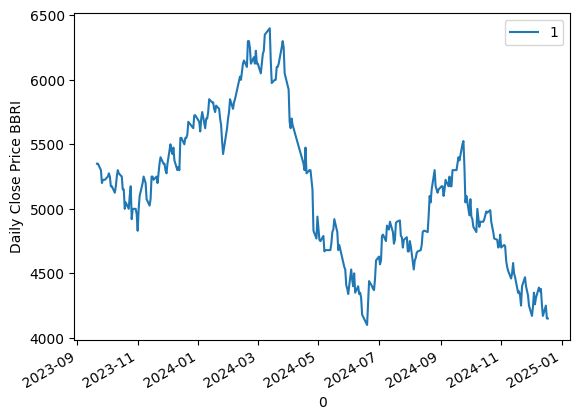

In [34]:
# line plots of time series
from pandas import read_csv
from matplotlib import pyplot
valid = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
print(valid.describe())
valid.plot()
pyplot.ylabel("Daily Close Price BBRI")
pyplot.show()

C:\Users\akhda\AppData\Local\Temp\ipykernel_23124\2594613765.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


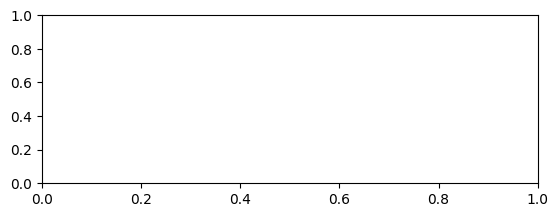

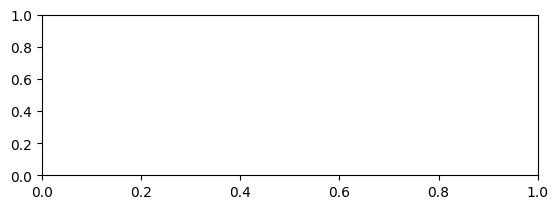

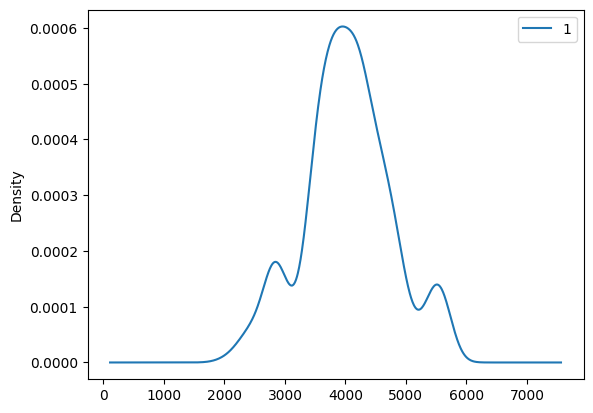

In [35]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

In [36]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    list_cfg = []
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        list_cfg.append([best_cfg,best_score])
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return list_cfg


In [37]:
# # grid search ARIMA parameters for time series
# # load dataset
# # series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# # evaluate parameters
# p_values = range(1, 5)
# d_values = [1]
# q_values = range(1, 5)
# warnings.filterwarnings("ignore")

# list_order = evaluate_models(series.values, p_values, d_values, q_values)

In [38]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 67.875


In [39]:
# tentukan model
# print(list_order)
# ARIMA_order = list_order[-1][0]
# print(ARIMA_order)
ARIMA_order = (1, 1, 1)
# print(ARIMA_order)

In [40]:
# evaluate grid search configured ARIMA model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 68.204


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                0
count  582.000000
mean     2.731813
std     68.208229
min   -349.692383
25%    -39.771118
50%      0.859131
75%     44.304932
max    282.034668


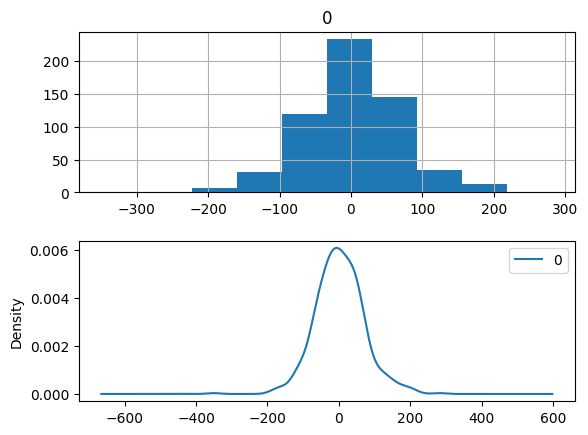

In [41]:
# summarize ARIMA forecast residuals

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [42]:
resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

2.7318127155303955


c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 68.150
                0
count  582.000000
mean    -0.000009
std     68.208237
min   -352.424316
25%    -42.503052
50%     -1.872803
75%     41.573181
max    279.302734


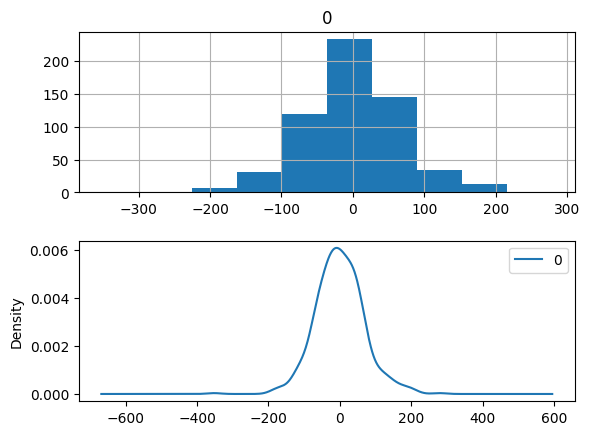

In [43]:
# plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 68.150
                0
count  582.000000
mean    -0.000009
std     68.208237
min   -352.424316
25%    -42.503052
50%     -1.872803
75%     41.573181
max    279.302734


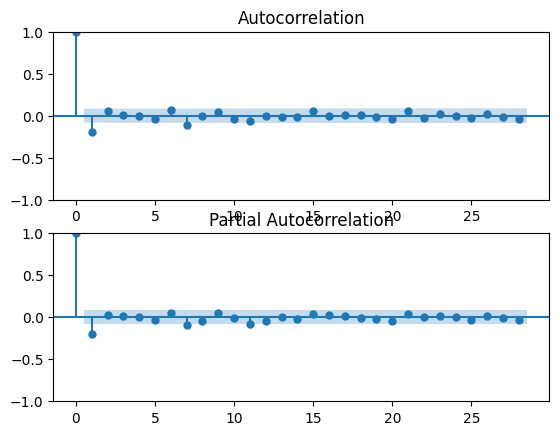

In [44]:
# ACF and PACF plots of residual errors of bias corrected forecasts

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = resi_bias
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(),method='ywm')
pyplot.show()

In [45]:
# save finalized model

# load data
# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

# load finalized model and make a prediction

In [46]:
# load finalized model and make a prediction

# series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
print('Predicted: %.3f' % yhat)

Predicted: 5377.233


# try on evaluation data

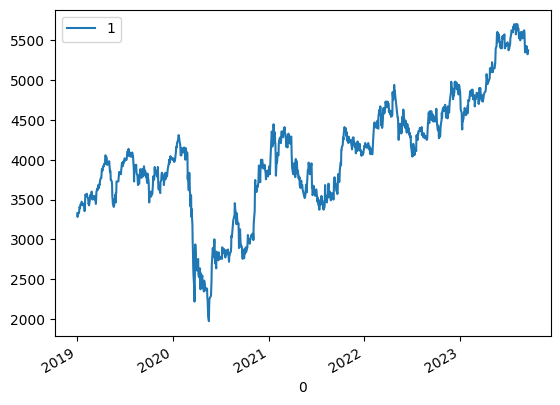

,1
0,
2019-01-01,3327.215332
2019-01-02,3281.761475
2019-01-03,3290.852295
2019-01-04,3327.215332
2019-01-07,3327.215332
...,...
2023-09-14,5425.000000
2023-09-15,5375.000000
2023-09-18,5325.000000


In [47]:
series.plot()
pyplot.show()
series

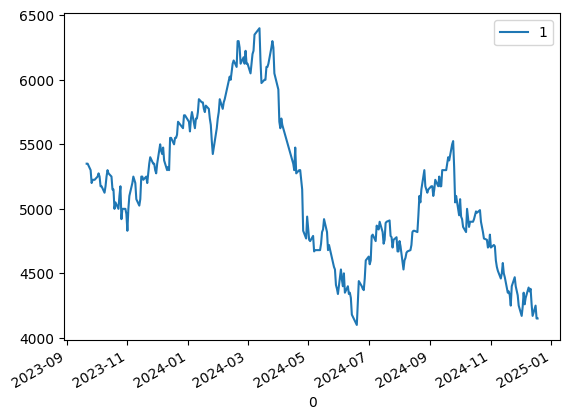

,1
0,
2023-09-21,5350.0
2023-09-22,5350.0
2023-09-25,5300.0
2023-09-26,5200.0
2023-09-27,5225.0
...,...
2024-12-12,4260.0
2024-12-13,4170.0
2024-12-16,4250.0


In [48]:
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
validation.squeeze('columns') 
validation.plot()
pyplot.show()
validation

>Predicted=5377.233, Expected=5350.000
>Predicted=5354.154, Expected=5350.000
>Predicted=5353.047, Expected=5300.000
>Predicted=5305.865, Expected=5200.000
>Predicted=5209.459, Expected=5225.000
>Predicted=5227.710, Expected=5225.000
>Predicted=5227.727, Expected=5250.000
>Predicted=5251.212, Expected=5275.000
>Predicted=5275.879, Expected=5250.000
>Predicted=5253.837, Expected=5175.000
>Predicted=5182.517, Expected=5175.000
>Predicted=5178.809, Expected=5125.000
>Predicted=5130.983, Expected=5175.000
>Predicted=5175.425, Expected=5250.000
>Predicted=5247.702, Expected=5300.000
>Predicted=5298.626, Expected=5275.000
>Predicted=5278.281, Expected=5250.000
>Predicted=5254.347, Expected=5150.000
>Predicted=5159.021, Expected=5150.000
>Predicted=5154.191, Expected=5000.000
>Predicted=5011.830, Expected=5050.000
>Predicted=5051.762, Expected=5000.000
>Predicted=5005.506, Expected=5100.000
>Predicted=5097.265, Expected=5175.000
>Predicted=5172.126, Expected=4920.000
>Predicted=4937.383, Expe

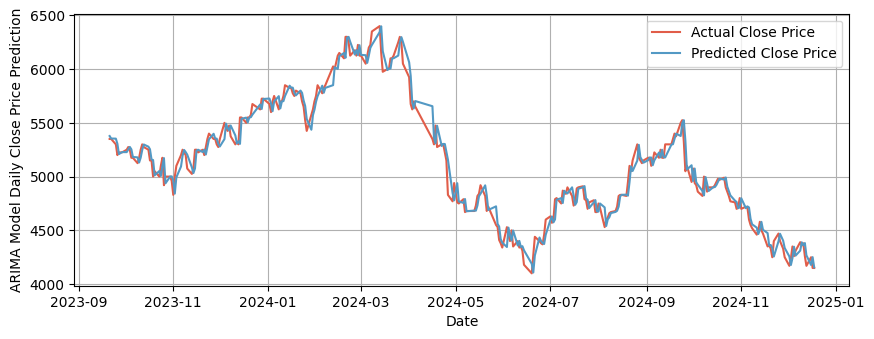

In [49]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
# dataset = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values.astype('float32')
history = [x for x in X]
# validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
validation = read_csv('validation.csv', header=None, index_col=0, parse_dates=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions) *100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('ARIMA Model Daily Close Price Prediction')
ax0.legend()
plt.show()

In [50]:
validation

,1
0,
2023-09-21,5350.0
2023-09-22,5350.0
2023-09-25,5300.0
2023-09-26,5200.0
2023-09-27,5225.0
...,...
2024-12-12,4260.0
2024-12-13,4170.0
2024-12-16,4250.0


In [51]:
y[:,0].shape

(300,)

In [52]:
predictions_flat.shape

(300,)

>Predicted=5375.000, Expected=5350
>Predicted=5350.000, Expected=5350
>Predicted=5350.000, Expected=5300
>Predicted=5300.000, Expected=5200
>Predicted=5200.000, Expected=5225
>Predicted=5225.000, Expected=5225
>Predicted=5225.000, Expected=5250
>Predicted=5250.000, Expected=5275
>Predicted=5275.000, Expected=5250
>Predicted=5250.000, Expected=5175
>Predicted=5175.000, Expected=5175
>Predicted=5175.000, Expected=5125
>Predicted=5125.000, Expected=5175
>Predicted=5175.000, Expected=5250
>Predicted=5250.000, Expected=5300
>Predicted=5300.000, Expected=5275
>Predicted=5275.000, Expected=5250
>Predicted=5250.000, Expected=5150
>Predicted=5150.000, Expected=5150
>Predicted=5150.000, Expected=5000
>Predicted=5000.000, Expected=5050
>Predicted=5050.000, Expected=5000
>Predicted=5000.000, Expected=5100
>Predicted=5100.000, Expected=5175
>Predicted=5175.000, Expected=4920
>Predicted=4920.000, Expected=5000
>Predicted=5000.000, Expected=5000
>Predicted=5000.000, Expected=4960
>Predicted=4960.000,

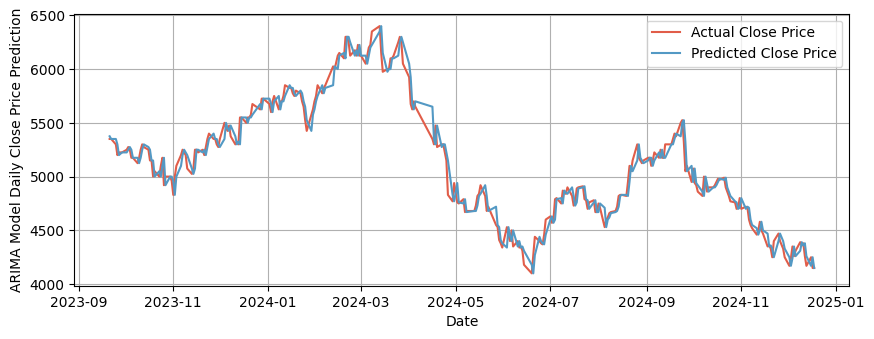

In [53]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "date"})
result_date = pd.concat([val_date, result],axis=1).set_index('date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('ARIMA Model Daily Close Price Prediction')
ax0.legend()
plt.show()

# try on test data

c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\akhda\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                0
count  732.000000
mean    -0.192974
std     78.548004
min   -349.692383
25%    -48.283203
50%      0.906738
75%     47.477295
max    282.034668


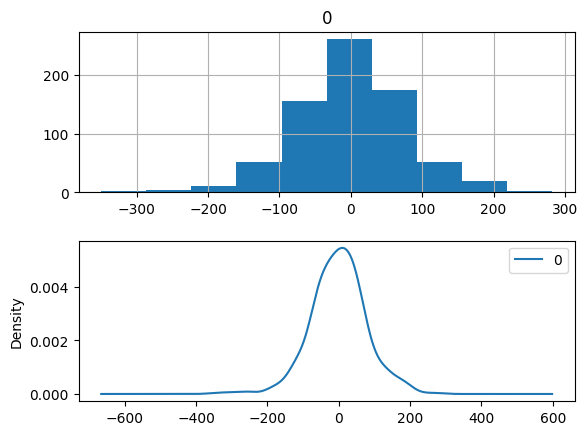

-0.19297382235527039


In [54]:
# find new residual on new training data

# load data
series = read_csv('../../Dataset/BBRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 1
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    # errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

resi_bias = residuals.describe()[0][1]
print(residuals.describe()[0][1])

In [55]:
# save finalized model

# load data
series = read_csv('../../Dataset/BBRI_Close.csv', header=0, index_col=0, parse_dates=True)
end = 300 # sesuaikan dengan split point di awal code
# volume = series['Volume']

split_point = len(series) - end
dataset, validation = series[0:split_point], series[split_point:]
X = dataset.values.astype('float32')
history = [x for x in X]

# difference data
# fit model
model = ARIMA(history, order=ARIMA_order)
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = resi_bias
# save model
model_fit.save('model.pkl')
np.save('model_bias.npy', [bias])

>Predicted=5351.229, Expected=5350.000
>Predicted=5350.122, Expected=5300.000
>Predicted=5302.940, Expected=5200.000
>Predicted=5206.534, Expected=5225.000
>Predicted=5224.785, Expected=5225.000
>Predicted=5224.802, Expected=5250.000
>Predicted=5248.287, Expected=5275.000
>Predicted=5272.954, Expected=5250.000
>Predicted=5250.912, Expected=5175.000
>Predicted=5179.592, Expected=5175.000
>Predicted=5175.884, Expected=5125.000
>Predicted=5128.058, Expected=5175.000
>Predicted=5172.500, Expected=5250.000
>Predicted=5244.777, Expected=5300.000
>Predicted=5295.701, Expected=5275.000
>Predicted=5275.356, Expected=5250.000
>Predicted=5251.422, Expected=5150.000
>Predicted=5156.096, Expected=5150.000
>Predicted=5151.266, Expected=5000.000
>Predicted=5008.905, Expected=5050.000
>Predicted=5048.837, Expected=5000.000
>Predicted=5002.581, Expected=5100.000
>Predicted=5094.340, Expected=5175.000
>Predicted=5169.201, Expected=4920.000
>Predicted=4934.458, Expected=5000.000
>Predicted=4997.967, Expe

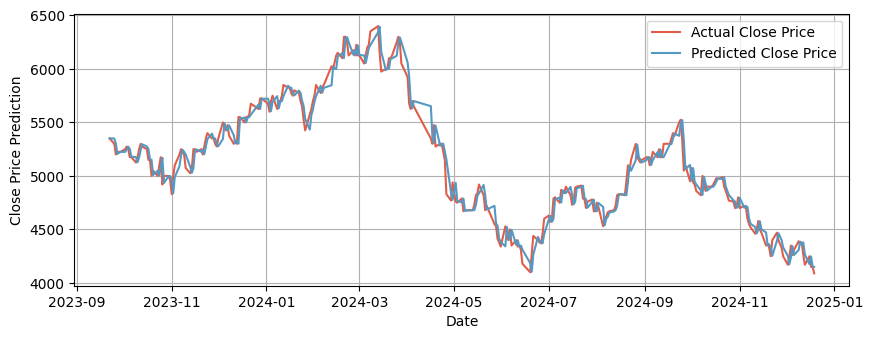

In [56]:
# load and evaluate the finalized model on the validation dataset

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# load model
model_fit = ARIMAResults.load('model.pkl')
bias = np.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + yhat
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=ARIMA_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    yhat = bias + yhat
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100 
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: 'Date'})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()

>Predicted=5350.000, Expected=5350
>Predicted=5350.000, Expected=5300
>Predicted=5300.000, Expected=5200
>Predicted=5200.000, Expected=5225
>Predicted=5225.000, Expected=5225
>Predicted=5225.000, Expected=5250
>Predicted=5250.000, Expected=5275
>Predicted=5275.000, Expected=5250
>Predicted=5250.000, Expected=5175
>Predicted=5175.000, Expected=5175
>Predicted=5175.000, Expected=5125
>Predicted=5125.000, Expected=5175
>Predicted=5175.000, Expected=5250
>Predicted=5250.000, Expected=5300
>Predicted=5300.000, Expected=5275
>Predicted=5275.000, Expected=5250
>Predicted=5250.000, Expected=5150
>Predicted=5150.000, Expected=5150
>Predicted=5150.000, Expected=5000
>Predicted=5000.000, Expected=5050
>Predicted=5050.000, Expected=5000
>Predicted=5000.000, Expected=5100
>Predicted=5100.000, Expected=5175
>Predicted=5175.000, Expected=4920
>Predicted=4920.000, Expected=5000
>Predicted=5000.000, Expected=5000
>Predicted=5000.000, Expected=4960
>Predicted=4960.000, Expected=4830
>Predicted=4830.000,

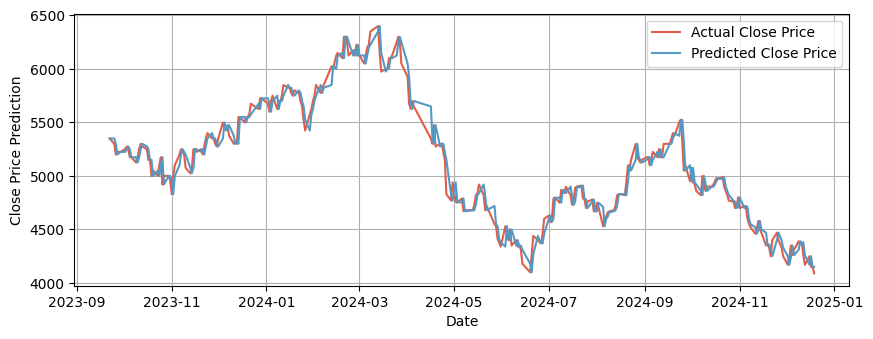

In [57]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare data
train = X

# load and prepare datasets
y = validation.values.astype('float32') # ambil dari cell sebelumnya no 15

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(y)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
mae = mean_absolute_error(y, predictions)
mape = mean_absolute_percentage_error(y, predictions)*100
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)

predictions_flat = np.array(predictions).reshape(-1)
y_reshaped = y.reshape(-1, 1)  # Reshape to a 2D array with one column
result = pd.DataFrame(np.array([y_reshaped.flatten(), predictions_flat]).T)
# result = pd.DataFrame(np.array([y[:,0],predictions_flat]).T)
val_date = validation.reset_index().iloc[:,[0]].rename(columns={0: "Date"})
result_date = pd.concat([val_date, result],axis=1).set_index('Date')
plt.style.use('default')
fig = plt.figure(figsize=(10, 4))
ax0 = fig.add_subplot(111)
# ax0.plot(result_date)
ax0.plot(result_date.index, result_date.iloc[:, 0], color='#e15d49', label='Actual Close Price')
ax0.plot(result_date.index, result_date.iloc[:, 1], color='#5399c4', label='Predicted Close Price')
ax0.grid()
fig.autofmt_xdate(rotation=0, ha='center')
ax0.set_xlabel('Date')
ax0.set_ylabel('Close Price Prediction')
ax0.legend()
plt.show()